In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 19.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.5/149.5 kB 15.0 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.6 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039289 sha256=85d2e079b908ca35bf5af79fd88f15e8eb1c174666e7370f878f1354fedb57f2
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
  Created wheel for umap-l

In [ ]:
# Code cell 1
# Import necessary libraries
import pandas as pd
import numpy as np
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from umap import UMAP
import matplotlib.pyplot as plt
import plotly.graph_objects as go
# Load the CSV file into a DataFrame
rra = r'/content/drive/MyDrive/restaurant_reviews_az.csv'
df= pd.read_csv(rra)

# Summary
print(df.head(5))
print(df.shape)
print(df.describe())


                review_id                 user_id             business_id  \
0  IVS7do_HBzroiCiymNdxDg  fdFgZQQYQJeEAshH4lxSfQ  sGy67CpJctjeCWClWqonjA   
1  QP2pSzSqpJTMWOCuUuyXkQ  JBLWSXBTKFvJYYiM-FnCOQ  3w7NRntdQ9h0KwDsksIt5Q   
2  oK0cGYStgDOusZKz9B1qug  2_9fKnXChUjC5xArfF8BLg  OMnPtRGmbY8qH_wIILfYKA   
3  E_ABvFCNVLbfOgRg3Pv1KQ  9MExTQ76GSKhxSWnTS901g  V9XlikTxq0My4gE8LULsjw   
4  Rd222CrrnXkXukR2iWj69g  LPxuausjvDN88uPr-Q4cQA  CA5BOxKRDPGJgdUQ8OUOpw   

   stars  useful  funny  cool  \
0      3       1      1     0   
1      5       1      1     1   
2      5       1      0     0   
3      5       0      0     0   
4      4       1      0     0   

                                                text                 date  
0  OK, the hype about having Hatch chili in your ...  2020-01-27 22:59:06  
1  Pandemic pit stop to have an ice cream.... onl...  2020-04-19 05:33:16  
2  I was lucky enough to go to the soft opening a...  2020-02-29 19:43:44  
3  I've gone to claim Jumpers all 

The longest headline has: 955 words


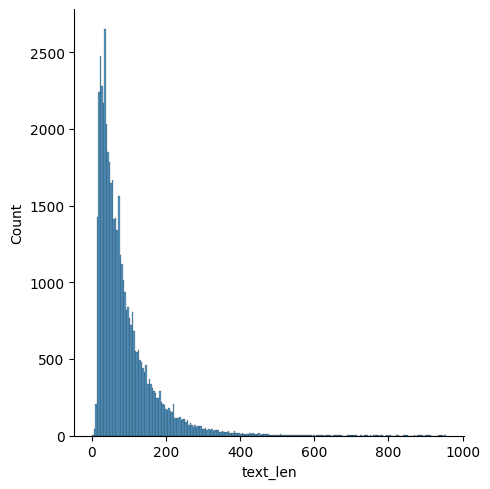

In [ ]:
# Code cell 2
# Create a new column containing the length each headline text
df["text_len"] = df["text"].apply(lambda x : len(x.split()))
data_text = df[['text']];
print("The longest headline has: {} words".format(df.text_len.max()))
# Visualize the length distribution
import seaborn as sns
sns.displot(df.text_len, kde=False)

In [ ]:
# Code Cell 3
# Instantiate BERTopic model
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)

# Fit the model on the text data
topics, probabilities = topic_model.fit_transform(df["text"])

# Visualize the topics using UMAP
umap_model = UMAP(n_neighbors=15, n_components=5, metric='cosine')
umap_embeddings = umap_model.fit_transform(probabilities)

2024-02-23 19:36:52,691 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1505 [00:00<?, ?it/s]

2024-02-23 20:41:01,258 - BERTopic - Embedding - Completed ✓
2024-02-23 20:41:01,261 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-23 20:42:44,174 - BERTopic - Dimensionality - Completed ✓
2024-02-23 20:42:44,180 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-02-23 20:51:32,471 - BERTopic - Cluster - Completed ✓
2024-02-23 20:51:32,497 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-02-23 20:51:41,677 - BERTopic - Representation - Completed ✓


In [ ]:
# Code Cell 4
# Visualize most relevant words for the top 10 topics
topic_model.visualize_topics()

In [ ]:
# Code Cell 5
# Visualize topic hierarchy for the top 30 topics
topic_model.visualize_hierarchy(top_n_topics=30)

In [ ]:
# Code Cell 6
# Create a new instance of BERTopic model with 15 topics
topic_model_15_topics = BERTopic(language="english", calculate_probabilities=True, verbose=True)

# Fit the model on the text data with 15 topics
topics_15, probabilities_15 = topic_model_15_topics.fit_transform(df["text"])

2024-02-23 21:03:28,110 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/1505 [00:00<?, ?it/s]

2024-02-23 22:04:39,766 - BERTopic - Embedding - Completed ✓
2024-02-23 22:04:39,768 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-23 22:06:01,674 - BERTopic - Dimensionality - Completed ✓
2024-02-23 22:06:01,678 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-02-23 22:14:33,930 - BERTopic - Cluster - Completed ✓
2024-02-23 22:14:33,957 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-02-23 22:14:43,338 - BERTopic - Representation - Completed ✓


In [ ]:
# Code cell 6
# Visualize most relevant words for the top 15 topics
topic_model_15_topics.visualize_topics()
# Visualize topic hierarchy for the top 15 topics
topic_model_15_topics.visualize_hierarchy(top_n_topics=15)

In [ ]:
# Code Cell 7
# Get topic allocation for the first 5 reviews
first_5_reviews = df["text"].head(5)
topics_first_5_reviews, _ = topic_model_15_topics.transform(first_5_reviews)

# Display the topic allocation
print("Topic Allocation for the first 5 reviews:")
for i, topic in enumerate(topics_first_5_reviews):
    print(f"Review {i + 1}: Topic {topic}")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-02-23 22:31:04,779 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-02-23 22:31:44,584 - BERTopic - Dimensionality - Completed ✓
2024-02-23 22:31:44,589 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-02-23 22:31:44,594 - BERTopic - Probabilities - Start calculation of probabilities with HDBSCAN
2024-02-23 22:31:44,719 - BERTopic - Probabilities - Completed ✓
2024-02-23 22:31:44,722 - BERTopic - Cluster - Completed ✓


Topic Allocation for the first 5 reviews:
Review 1: Topic 240
Review 2: Topic 272
Review 3: Topic 8
Review 4: Topic -1
Review 5: Topic -1


In [ ]:
# Code Cell 8
# Get the most relevant words for the first topic
first_topic_id = 12  # get words for the first topic
topic_words_first_topic = topic_model_15_topics.get_topic(first_topic_id)

# Display the most relevant words for the first topic
print(f"Most relevant words for Topic {first_topic_id}: {topic_words_first_topic}")


Most relevant words for Topic 12: [('ramen', 0.058444970516893555), ('broth', 0.01609304749378023), ('noodles', 0.01120023587282696), ('spicy', 0.008944556245432639), ('miso', 0.008240087977406994), ('pork', 0.0078038087832138225), ('tonkotsu', 0.007576772926470601), ('tonkatsu', 0.006531947327742583), ('gyoza', 0.0054115946940952765), ('raijin', 0.005149159065704122)]


In [ ]:
# For text cell 9
# Interpret each topic based on the most relevant words
topic_order = [12, 9, 14, 11, 0, 8, 2, 7, 1, 4, 6, 10, 5, 3, 13]

for i, topic_id in enumerate(topic_order):
    topic_words_with_weights = topic_model_15_topics.get_topic(topic_id)

    # Extract only the words from the tuple, excluding the weights
    topic_words = [word[0] for word in topic_words_with_weights]

    print(f"\nTopic {i+1}:")
    print(f"Most relevant words: {', '.join(topic_words)}")



Topic 1:
Most relevant words: ramen, broth, noodles, spicy, miso, pork, tonkotsu, tonkatsu, gyoza, raijin

Topic 2:
Most relevant words: indian, naan, masala, tikka, samosas, chicken, paneer, spice, garlic, biryani

Topic 3:
Most relevant words: coffee, latte, dutch, iced, bros, espresso, starbucks, cup, chai, shop

Topic 4:
Most relevant words: brisket, bbq, ribs, pulled, mac, pork, meat, sides, sauce, tender

Topic 5:
Most relevant words: burger, burgers, fries, bun, patty, tots, graze, onion, cheese, rings

Topic 6:
Most relevant words: italian, pasta, alfredo, spaghetti, bolognese, lasagna, sauce, bread, fettuccine, carbonara

Topic 7:
Most relevant words: pizza, crust, pizzas, pepperoni, toppings, slice, thin, cheese, garlic, it

Topic 8:
Most relevant words: covid, covid19, during, precautions, pandemic, safe, food, are, been, clean

Topic 9:
Most relevant words: great, food, staff, service, place, friendly, love, amazing, always, is

Topic 10:
Most relevant words: tucson, great

Interpret each topic: What is the theme of each topic?

Topic 1: Ramen dishes, with a focus on spicy broths and pork flavors.

Topic 2: Indian cuisine, highlighting naan, masala dishes, and samosas.

Topic 3: Coffee, with emphasis on lattes and espresso drinks.

Topic 4: Barbecue, specifically brisket and ribs.

Topic 5: Burgers and related sides like fries and onion rings.

Topic 6: Italian pasta dishes, including Alfredo and bolognese.

Topic 7: Pizza, with attention to crust and toppings.

Topic 8: COVID-19 precautions and safety measures in restaurants.

Topic 9: General praise for food, staff, and service.

Topic 10: Positive sentiments about Tucson's dining places.

Topic 11: Beer offerings and bar atmosphere.

Topic 12: Authentic Mexican food and restaurants.

Topic 13: Tacos, particularly street-style and specific varieties.

Topic 14: Sushi, including rolls, nigiri, and sashimi.

Topic 15: Sonoran hot dogs, a regional specialty with bacon-wrapped sausages.

Batches:   0%|          | 0/1505 [00:00<?, ?it/s]

2024-02-24 00:07:59,985 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-02-24 00:08:00,141 - BERTopic - Dimensionality - Completed ✓
2024-02-24 00:08:00,143 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-02-24 00:08:04,080 - BERTopic - Probabilities - Start calculation of probabilities with HDBSCAN
2024-02-24 00:17:28,044 - BERTopic - Probabilities - Completed ✓
2024-02-24 00:17:28,051 - BERTopic - Cluster - Completed ✓


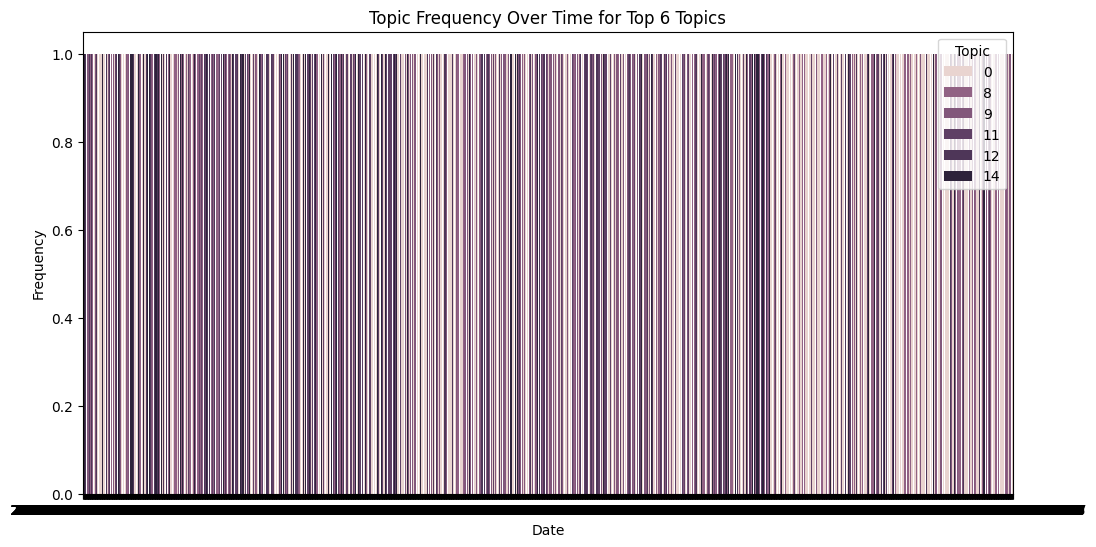

In [ ]:
# Code Cell 10
import seaborn as sns

# Assuming 'date' is the name of the date column in your DataFrame
df['date'] = pd.to_datetime(df['date'])

# Get the topics for the entire dataset
all_topics, _ = topic_model_15_topics.transform(df["text"])

# Select the top 6 topics
top_6_topics = [12, 9, 14, 11, 0, 8]

# Filter data for the top 6 topics
df_top_topics = df.copy()
df_top_topics['topic'] = all_topics
df_top_topics = df_top_topics[df_top_topics['topic'].isin(top_6_topics)]

# Plot the topic frequency over time
plt.figure(figsize=(12, 6))
sns.countplot(x='date', hue='topic', data=df_top_topics)
plt.title('Topic Frequency Over Time for Top 6 Topics')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend(title='Topic')
plt.show()

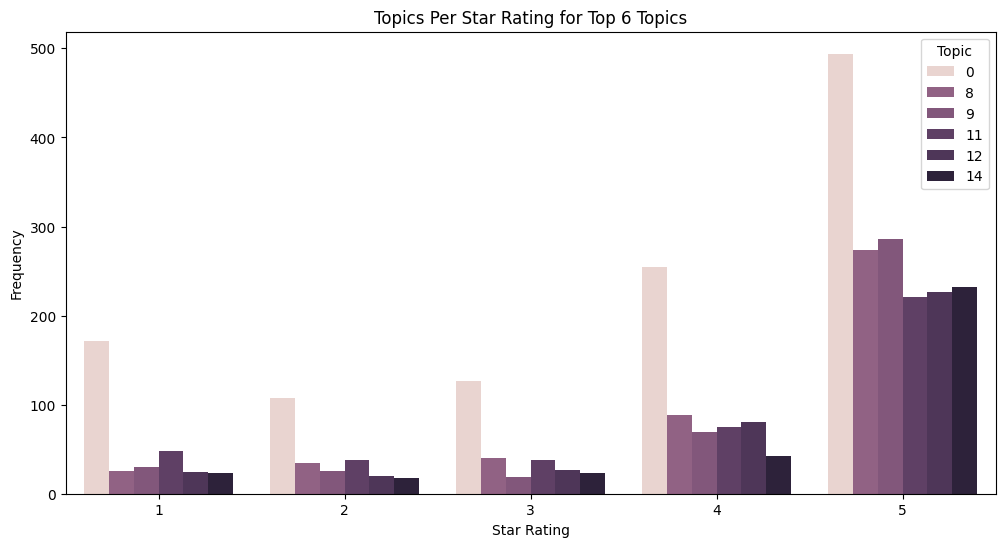

In [ ]:
# Code Cell 11
# Plot the topics per star rating for the top 6 topics
plt.figure(figsize=(12, 6))
sns.countplot(x='stars', hue='topic', data=df_top_topics)
plt.title('Topics Per Star Rating for Top 6 Topics')
plt.xlabel('Star Rating')
plt.ylabel('Frequency')
plt.legend(title='Topic')
plt.show()

Topic Frequency Over Time:
Some topics remaining consistently prevalent while others fluctuate or emerge over specific periods and this could be due to seasonal trends, changes in consumer preferences, or external events impacting the restaurant industry.

Topics Per Star Rating:
Topics that are more frequent in higher star ratings (4-5 stars) may indicate aspects of service or food quality that customers appreciate. Conversely, topics that are more common in lower star ratings (1-2 stars) could point to areas where restaurants are failing to meet customer expectations.

The visualizations indicate:

Good Restaurant Experiences: Topics associated with higher star ratings likely include specific dishes or cuisines (e.g., "ramen", "masala", "authentic Mexican food") and positive service experiences (e.g., "great food staff").

Bad Restaurant Experiences: Lower star ratings might correlate with negative service experiences (potentially indicated by the topic "covid_covid19_during") and dissatisfaction with certain foods (like "pizza crust").

Business Implications:

Focusing on and promoting the aspects related to highly-rated topics can enhance customer satisfaction and attract more patrons.

Addressing issues highlighted in negatively-rated topics, such as improving food quality and service, especially during challenging times, is crucial for maintaining a good reputation and customer loyalty.

In [ ]:
# Code Cell 13
# Specify a few topics for zero-shot modeling
zero_shot_topics = ["customer service", "food quality", "atmosphere", "price", "location"]

# Create a new instance of BERTopic model for zero-shot modeling
zero_shot_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)

# Fit the model on the text data
zero_shot_topics, zero_shot_probabilities = zero_shot_model.fit_transform(df["text"])

2024-02-24 01:00:36,706 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/1505 [00:00<?, ?it/s]

2024-02-24 02:02:52,933 - BERTopic - Embedding - Completed ✓
2024-02-24 02:02:52,936 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-24 02:04:08,775 - BERTopic - Dimensionality - Completed ✓
2024-02-24 02:04:08,784 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-02-24 02:12:14,376 - BERTopic - Cluster - Completed ✓
2024-02-24 02:12:14,404 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-02-24 02:12:24,153 - BERTopic - Representation - Completed ✓


In [ ]:
# Code Cell 14
# Visualize most relevant words for the top 10 topics
zero_shot_model.visualize_topics()

# Visualize topic hierarchy for the top 10 topics
zero_shot_model.visualize_hierarchy(top_n_topics=10)

Interpret each topic in the zero shot topic model: what is each topic about?

Topic 1 "pizza_crust_pizzas": Discussions about pizza, with a focus on the crust.

Topic 2 "burger_burgers_fries": Reviews centered on burgers and fries.

Topic 3 "tacos_taco_street": Mentions of street-style tacos.

Topic 4 "tucson_great_in": Positive reviews specific to Tucson's dining scene.

Topic 5 "place_great_love": General positive feedback about certain restaurants.

Topic 6 "sushi_roll_rolls": Experiences related to sushi rolls.

Topic 7 "mexican_authentic_food": Commentary on authentic Mexican cuisine.

Topic 8 "fish_salmon_shrimp": Reviews focusing on seafood dishes.

Topic 9 "italian_pasta_alfredo": Discussions about Italian pasta, including Alfredo dishes.

Topic 10 "beer_beers_bar": Reviews about beer selections and bar experiences.